Take 1: (1) drop "special_cosiderations" and "status" colums

Take 8: (1) change all layers to sigmoid; 

Take 9: (1) change `n` of buckets; (2) change `n` of hiddent neurons

# Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ["EIN", "NAME","SPECIAL_CONSIDERATIONS", "STATUS"])
print(application_df.shape)
application_df.head(10)

(34299, 8)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1
5,T3,Independent,C1200,Preservation,Trust,0,5000,1
6,T3,Independent,C1000,Preservation,Trust,100000-499999,31452,1
7,T3,Independent,C2000,Preservation,Trust,10M-50M,7508025,1
8,T7,Independent,C1000,ProductDev,Trust,1-9999,94389,1
9,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

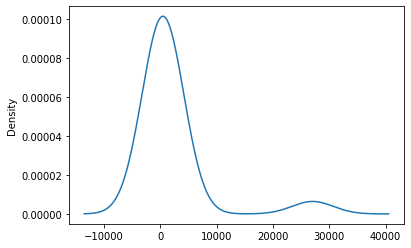

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
# use 500
replace_application = list(app_type_count[app_type_count <1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
unique_class = application_df.CLASSIFICATION.nunique()
class_count = application_df.CLASSIFICATION.value_counts()
print(unique_class)
print(class_count)

71
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1820        1
C2190        1
C2500        1
C2380        1
C1900        1
Name: CLASSIFICATION, Length: 71, dtype: int64


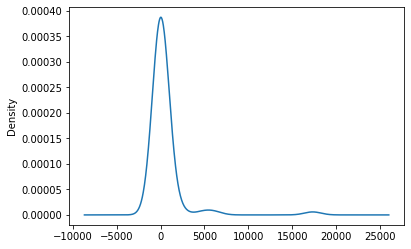

In [8]:
# Visualize the value counts of CLASSIFICATION
class_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
# use 1000 for fewer bins
replace_class = list(class_count[class_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
# name categorical_cat - used in the next cell
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"]
X = application_df.drop(columns = "IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  150
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 50

nn = tf.keras.models.Sequential()

# ReLu is faster to compute than the sigmoid function, and its derivative is faster to compute
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               5700      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 25,901
Trainable params: 25,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200,callbacks=[cp_callback])

Epoch 1/200
804/804 [==============================] - 1s 992us/step - loss: 0.5971 - accuracy: 0.6988
Epoch 2/200
155/804 [====>.........................] - ETA: 0s - loss: 0.5753 - accuracy: 0.7190
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5756 - accuracy: 0.7215
Epoch 3/200
361/804 [============>.................] - ETA: 0s - loss: 0.5710 - accuracy: 0.7256
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 994us/step - loss: 0.5705 - accuracy: 0.7247
Epoch 4/200
564/804 [====================>.........] - ETA: 0s - loss: 0.5650 - accuracy: 0.7266
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 993us/step - loss: 0.5639 - accuracy: 0.7276
Epoch 5/200
748/804 [==========================>...] - ETA: 0s - loss: 0.5606 - accuracy: 0.7314
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [=

399/804 [=============>................] - ETA: 0s - loss: 0.5397 - accuracy: 0.7394
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5441 - accuracy: 0.7365
Epoch 40/200
624/804 [======================>.......] - ETA: 0s - loss: 0.5440 - accuracy: 0.7369
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5439 - accuracy: 0.7370
Epoch 41/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5439 - accuracy: 0.7374
Epoch 42/200
  1/804 [..............................] - ETA: 0s - loss: 0.4127 - accuracy: 0.9062
Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5437 - accuracy: 0.7366
Epoch 43/200
186/804 [=====>........................] - ETA: 0s - loss: 0.5498 - accuracy: 0.7303
Epoch 00043: saving model to checkpoints\weights.43.hdf5
804/804 [===============

804/804 [==============================] - 1s 991us/step - loss: 0.5385 - accuracy: 0.7393
Epoch 77/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5384 - accuracy: 0.7392
Epoch 78/200
 51/804 [>.............................] - ETA: 0s - loss: 0.5366 - accuracy: 0.7353
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5383 - accuracy: 0.7399
Epoch 79/200
250/804 [========>.....................] - ETA: 0s - loss: 0.5451 - accuracy: 0.7331
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5380 - accuracy: 0.7397
Epoch 80/200
447/804 [===============>..............] - ETA: 0s - loss: 0.5355 - accuracy: 0.7409
Epoch 00080: saving model to checkpoints\weights.80.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5380 - accuracy: 0.7391
Epoch 81/200
668/804 [=======================>......] - ETA: 0s - loss: 0.5

804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7406
Epoch 115/200
296/804 [==========>...................] - ETA: 0s - loss: 0.5355 - accuracy: 0.7437
Epoch 00115: saving model to checkpoints\weights.115.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7411
Epoch 116/200
510/804 [==================>...........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7388
Epoch 00116: saving model to checkpoints\weights.116.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7405
Epoch 117/200
684/804 [========================>.....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7422
Epoch 00117: saving model to checkpoints\weights.117.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7406
Epoch 118/200
804/804 [==============================] - 1s 988us/step - loss: 0.5349 - accuracy: 0.7400
Epoch 119/200
101/804 [==>...........................] - ETA: 0s - l

804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7418
Epoch 152/200
561/804 [===================>..........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7387
Epoch 00152: saving model to checkpoints\weights.152.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7418
Epoch 153/200
773/804 [===========================>..] - ETA: 0s - loss: 0.5342 - accuracy: 0.7407
Epoch 00153: saving model to checkpoints\weights.153.hdf5
804/804 [==============================] - 1s 992us/step - loss: 0.5337 - accuracy: 0.7410
Epoch 154/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7420
Epoch 155/200
151/804 [====>.........................] - ETA: 0s - loss: 0.5352 - accuracy: 0.7380
Epoch 00155: saving model to checkpoints\weights.155.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7416
Epoch 156/200
340/804 [===========>..................] - ETA: 0s - l

804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7421
Epoch 189/200
804/804 [==============================] - 1s 999us/step - loss: 0.5327 - accuracy: 0.7419
Epoch 190/200
  1/804 [..............................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7500
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7416
Epoch 191/200
207/804 [======>.......................] - ETA: 0s - loss: 0.5285 - accuracy: 0.7456
Epoch 00191: saving model to checkpoints\weights.191.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7420
Epoch 192/200
399/804 [=============>................] - ETA: 0s - loss: 0.5357 - accuracy: 0.7392
Epoch 00192: saving model to checkpoints\weights.192.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7421
Epoch 193/200
631/804 [======================>.......] - ETA: 0s - l

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5833 - accuracy: 0.7248
Loss: 0.5832587480545044, Accuracy: 0.724781334400177


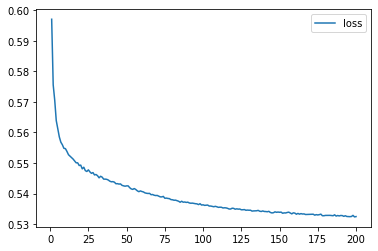

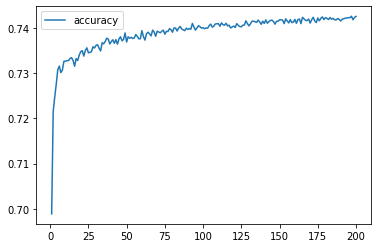

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
# score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input
history_df.plot(y="loss")
# Plot the accuracy
# the higher the better 
history_df.plot(y="accuracy")

In [21]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_09.h5")